In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

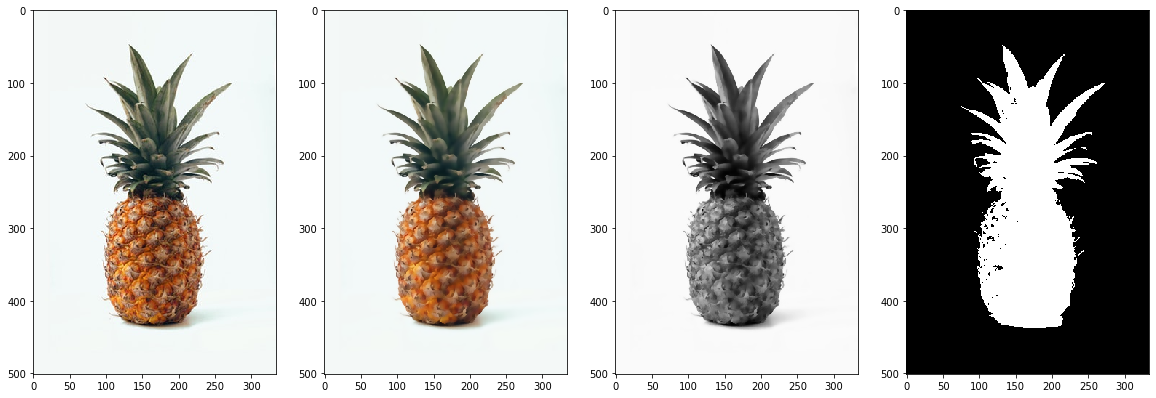

In [16]:

# 加載 圖像
# load the image
img = cv2.imread('data/pine_apple.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# 雙邊濾波器¶
# 模糊 以 消除 噪音
# Blurring for removing the noise 
img_blur = cv2.bilateralFilter(img, d = 7, 
                               sigmaSpace = 75, sigmaColor =75)

# 轉換為 灰度
# Convert to grayscale 
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)

# 使用及設定 閾值
# Apply the thresholding  https://docs.opencv.org/3.3.1/d7/d4d/tutorial_py_thresholding.html

a = img_gray.max()  
_, thresh = cv2.threshold(img_gray, a/2+60, a,cv2.THRESH_BINARY_INV)


# plt.imshow(img_copy ) 
plt.figure(figsize = (20, 10))
plt.subplot(1, 4, 1); plt.imshow(img)
plt.subplot(1, 4, 2); plt.imshow(img_blur)
plt.subplot(1, 4, 3); plt.imshow(img_gray,cmap = 'gray')
plt.subplot(1, 4, 4); plt.imshow(thresh,cmap = 'gray')

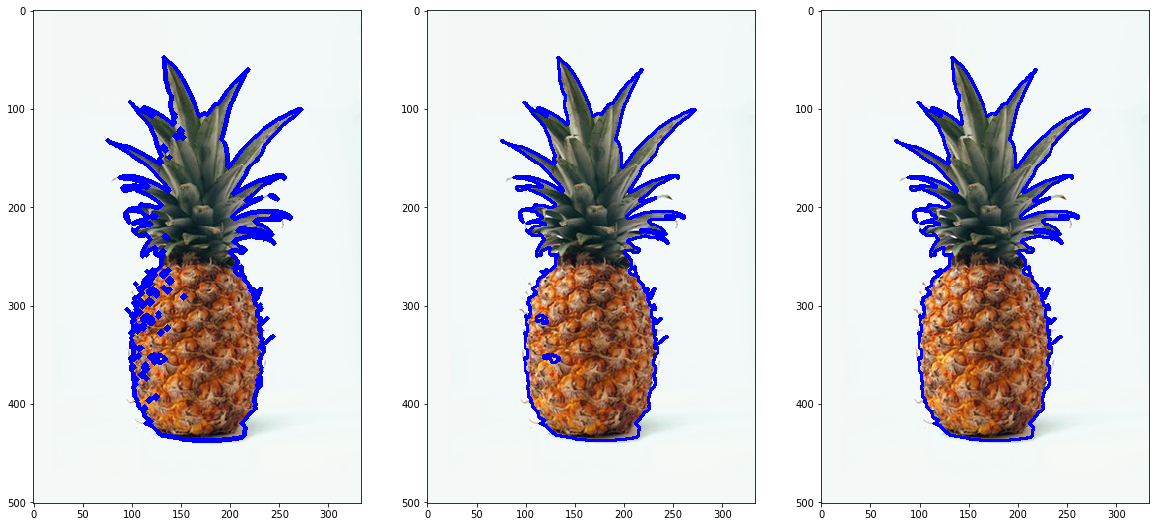

In [25]:
# 輪廓檢測可以通過 cv2.findContours()OpenCV中的函數
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img_copy = img.copy()
cv2.drawContours(img_copy,contours,-1,(0,0,255),3)


# 按面積排序輪廓 Sort the contours 
# 取前3大個輪廓

contours_3 = sorted(contours, key = cv2.contourArea, reverse = True)[:3]
img_copy_3 = img.copy()
cv2.drawContours(img_copy_3, contours_3, contourIdx = -1, 
                  color = (0, 0,255), thickness = 2)

# 取最大輪廓

contours_1 = sorted(contours, key = cv2.contourArea, reverse = True)[:1]
img_copy_1 = img.copy()
cv2.drawContours(img_copy_1, contours_1, contourIdx = -1, 
                         color = (0, 0,255), thickness = 2)

# plt.imshow(img_copy )
plt.figure(figsize = (20, 10))
plt.subplot(1, 3, 1); plt.imshow(img_copy)
plt.subplot(1, 3, 2); plt.imshow(img_copy_3)
plt.subplot(1, 3, 3); plt.imshow(img_copy_1)

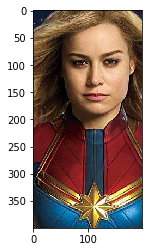

In [65]:
captin = cv2.imread('data/captin_marvel.jpg')
captin = cv2.cvtColor(captin, cv2.COLOR_BGR2RGB)
captin = img_messi[100:500, 270:470]
plt.imshow(captin)

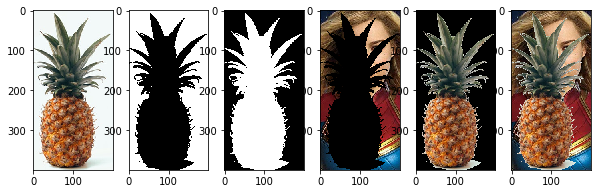

In [74]:
img_2 = img[40:440, 80:280]
img_gray = cv2.cvtColor(img_2, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(img_gray, 254/2+100, 255, cv2.THRESH_BINARY)
thresh_inv = cv2.bitwise_not(thresh)

#函數 cv2.bitwise_and（） 將只傳遞圖像的 白色區域   
img_c = cv2.bitwise_and(captin, captin, mask = thresh) 
img_a = cv2.bitwise_and(img_2, img_2, mask = thresh_inv) 
img_ca = cv2.add(img_c,img_a)
plt.figure(figsize = (10, 6))
plt.subplot(1, 6, 1); plt.imshow(img_2)
plt.subplot(1, 6, 2); plt.imshow(thresh,cmap = 'gray')
plt.subplot(1, 6, 3); plt.imshow(thresh_inv,cmap = 'gray')
plt.subplot(1, 6, 4); plt.imshow(img_c)
plt.subplot(1, 6, 5); plt.imshow(img_a)
plt.subplot(1, 6, 6); plt.imshow(img_ca)

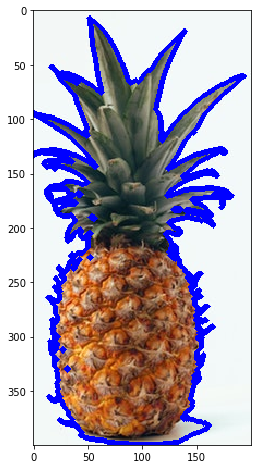

In [76]:
contours, hierarchy = cv2.findContours(thresh_inv,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img_2_copy=img_2.copy()
cv2.drawContours(img_2_copy,contours,-1,(0,0,255),3)
display(img_2_copy)